<a href="https://colab.research.google.com/github/sam19980822/3rd-ML100Days/blob/master/HW_D84_Dropout_%26_Batch_normalization_%26_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import keras
import itertools
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization,Dropout
from keras import regularizers


In [5]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
EPOCHS = 50
drp_ratio = 0.3

## 只加入Batch Normalization的模型

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_BatchNorm = Sequential([
    Dense(512, input_shape=x_train.shape[1:]),
    # BatchNormalization(),
    Activation('relu'),
    Dense(256),
    # BatchNormalization(),
    Activation('relu'),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

model_BatchNorm.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_BatchNorm.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_BatchNorm.fit(x_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(x_test, y_test), 
                    shuffle=True)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_33 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_35 (Activation)   (None, 128)             

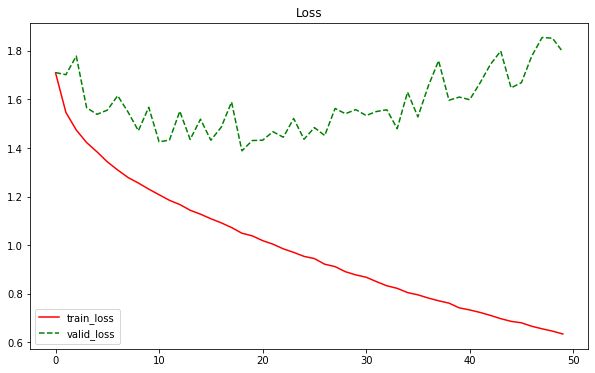

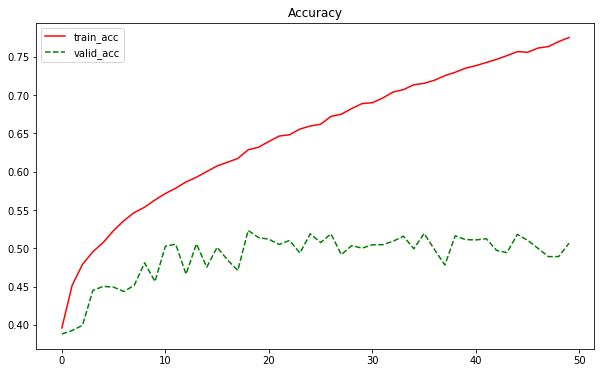

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(len(model_BatchNorm.history.history["loss"])),model_BatchNorm.history.history["loss"], '-', label='train_loss', color='r')
plt.plot(range(len(model_BatchNorm.history.history["val_loss"])),model_BatchNorm.history.history["val_loss"], '--', label='valid_loss', color='g')
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(len(model_BatchNorm.history.history["acc"])),model_BatchNorm.history.history["acc"], '-', label='train_acc', color='r')
plt.plot(range(len(model_BatchNorm.history.history["val_acc"])),model_BatchNorm.history.history["val_acc"], '--', label='valid_acc', color='g')
plt.title("Accuracy")
plt.legend()
plt.show()



## 只加入Dropout的模型 (0.3,0.4,0.5 看哪個表現好)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_Dropout = Sequential([
    Dense(512, input_shape=x_train.shape[1:]),
    Dropout(drp_ratio),
    Activation('relu'),
    Dense(256),
    Dropout(drp_ratio),
    Activation('relu'),
    Dense(128),
    Dropout(drp_ratio),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

model_Dropout.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_Dropout.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_____

In [55]:
dropout_ratio = [0.3,0.4,0.5]
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for drp_ratio in dropout_ratio:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (drp_ratio))
    model_Dropout = Sequential([
    Dense(512, input_shape=x_train.shape[1:]),
    # Dropout(drp_ratio),
    Activation('relu'),
    Dense(256),
    # Dropout(drp_ratio),
    Activation('relu'),
    Dense(128),
    Dropout(drp_ratio),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    ])

    model_Dropout.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model_Dropout.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model_Dropout.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model_Dropout.history.history["loss"]
    valid_loss = model_Dropout.history.history["val_loss"]
    train_acc = model_Dropout.history.history["acc"]
    valid_acc = model_Dropout.history.history["val_acc"]
    
    exp_name_tag = "drp_ratio-%s" % str(drp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.300000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_3 (Activation

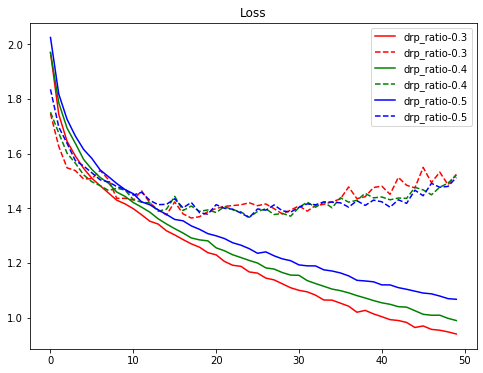

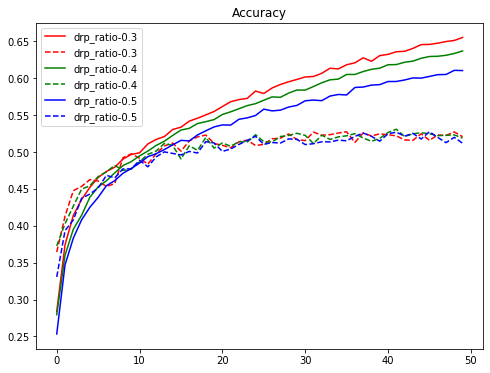

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 只加入Regularization的模型

In [49]:

model_l2_Reg = Sequential([
    Dense(512, 
          input_shape=x_train.shape[1:],
          # kernel_regularizer = regularizers.l2(0.01),
          activation = 'relu'),

    Dense(256,
          # kernel_regularizer = regularizers.l2(0.01),
          activation = 'relu'),
    
    Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activation = 'relu'),

    Dense(10,activation = 'softmax'),
    ])
model_l2_Reg.summary()

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_l2_Reg.compile(loss="categorical_crossentropy", 
                     metrics=["accuracy"], 
                     optimizer=optimizer)

model_l2_Reg.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.2810 - acc: 0.3148 - val_loss: 1.8554 - val_acc: 0.3911
Epoch 2/50
50000/50000 [==============================

In [48]:



model_l1_Reg = Sequential([
    Dense(512, 
          input_shape=x_train.shape[1:],
          # kernel_regularizer = regularizers.l1(0.01),
          activation = 'relu'),

    Dense(256,
          # kernel_regularizer = regularizers.l1(0.01),
          activation = 'relu'),
    
    Dense(128,
          kernel_regularizer = regularizers.l1(0.01),
          activation = 'relu'),

    Dense(10,activation = 'softmax'),
    ])
model_l1_Reg.summary()

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_l1_Reg.compile(loss="categorical_crossentropy", 
                     metrics=["accuracy"], 
                     optimizer=optimizer)

model_l1_Reg.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 4.8943 - acc: 0.3091 - val_loss: 2.0331 - val_acc: 0.3568
Epoch 2/50
50000/50000 [==============================

In [50]:
model_l1l2_Reg = Sequential([
    Dense(512, 
          input_shape=x_train.shape[1:],
          # kernel_regularizer = regularizers.l1_l2(0.01,0.01),
          activation = 'relu'),

    Dense(256,
          # kernel_regularizer = regularizers.l1_l2(0.01,0.01),
          activation = 'relu'),
    
    Dense(128,
          kernel_regularizer = regularizers.l1_l2(0.01,0.01),
          activation = 'relu'),

    Dense(10,activation = 'softmax'),
    ])
model_l1l2_Reg.summary()

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_l1l2_Reg.compile(loss="categorical_crossentropy", 
                     metrics=["accuracy"], 
                     optimizer=optimizer)

model_l1l2_Reg.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_60 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 74us/step - loss: 5.3319 - acc: 0.2957 - val_loss: 2.1082 - val_acc: 0.3415
Epoch 2/50
50000/50000 [==============================

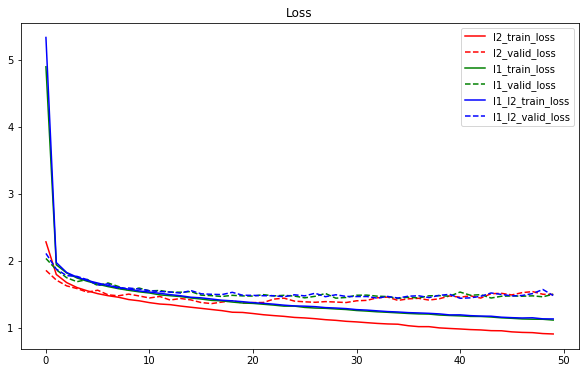

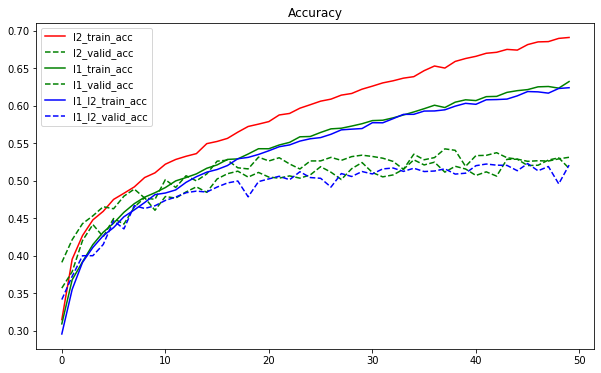

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(len(model_l2_Reg.history.history["loss"])),model_l2_Reg.history.history["loss"], '-', label='l2_train_loss', color='r')
plt.plot(range(len(model_l2_Reg.history.history["val_loss"])),model_l2_Reg.history.history["val_loss"], '--', label='l2_valid_loss', color='r')
plt.plot(range(len(model_l1_Reg.history.history["loss"])),model_l1_Reg.history.history["loss"], '-', label='l1_train_loss', color='g')
plt.plot(range(len(model_l1_Reg.history.history["val_loss"])),model_l1_Reg.history.history["val_loss"], '--', label='l1_valid_loss', color='g')
plt.plot(range(len(model_l1l2_Reg.history.history["loss"])),model_l1l2_Reg.history.history["loss"], '-', label='l1_l2_train_loss', color='b')
plt.plot(range(len(model_l1l2_Reg.history.history["val_loss"])),model_l1l2_Reg.history.history["val_loss"], '--', label='l1_l2_valid_loss', color='b')



plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(len(model_l2_Reg.history.history["acc"])),model_l2_Reg.history.history["acc"], '-', label='l2_train_acc', color='r')
plt.plot(range(len(model_l2_Reg.history.history["val_acc"])),model_l2_Reg.history.history["val_acc"], '--', label='l2_valid_acc', color='g')
plt.plot(range(len(model_l1_Reg.history.history["acc"])),model_l1_Reg.history.history["acc"], '-', label='l1_train_acc', color='g')
plt.plot(range(len(model_l1_Reg.history.history["val_acc"])),model_l1_Reg.history.history["val_acc"], '--', label='l1_valid_acc', color='g')
plt.plot(range(len(model_l1l2_Reg.history.history["acc"])),model_l1l2_Reg.history.history["acc"], '-', label='l1_l2_train_acc', color='b')
plt.plot(range(len(model_l1l2_Reg.history.history["val_acc"])),model_l1l2_Reg.history.history["val_acc"], '--', label='l1_l2_valid_acc', color='b')


plt.title("Accuracy")
plt.legend()
plt.show()



發現regularizer要加在比較後面的Dense層才有效  
不知道為什麼  

## 結論：Regularization > Dropout >>> BatchNormalization
至於Dropout到底要選0.3,0.4還是0.5，不太確定(0.3在train data表現最好)